# Task 1 - Distribution of genes among the different clusters - 4_tree-like
This notebook analyses the distribution of individual genes among the different clusters.

This notebook is based on the single-cell tutorial (https://github.com/theislab/single-cell-tutorial). For further explanations of the applied methods please refer to above source.

In [1]:
import scanpy as sc
import numpy as np
import scipy as sp
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import rcParams
from matplotlib import colors
import seaborn as sb
import os
from os import listdir
from os.path import isfile, join
import logging

In [2]:
plt.rcParams['figure.figsize']=(8,8) #rescale figures
sc.settings.verbosity = 3

### Load adata

In [3]:
adata = sc.read_h5ad('../data/adata/rev_processed_adata4.h5ad')
adata.obs

sample_id sample_nr  donor  n_genes_by_counts  \
AAACCCATCACGTCCT-1-1-0-0-0  4_tree-like         0  mouse               8336   
AAACGAAAGGTGCCAA-1-1-0-0-0  4_tree-like         0  mouse               8049   
AAACGAACACCAGACC-1-1-0-0-0  4_tree-like         0  mouse               9346   
AAACGAATCCGTTTCG-1-1-0-0-0  4_tree-like         0  mouse               8640   
AAACGAATCTATACTC-1-1-0-0-0  4_tree-like         0  mouse               8196   
...                                 ...       ...    ...                ...   
TTTGGTTCAACCGTAT-1-1-0-0-0  4_tree-like         0  mouse               8188   
TTTGGTTCAGCTGCCA-1-1-0-0-0  4_tree-like         0  mouse               8774   
TTTGTTGGTGCAACAG-1-1-0-0-0  4_tree-like         0  mouse               7939   
TTTGTTGGTTTCTATC-1-1-0-0-0  4_tree-like         0  mouse               8913   
TTTGTTGTCAATGCAC-1-1-0-0-0  4_tree-like         0  mouse               8940   

                            log1p_n_genes_by_counts  total_counts  \
AAACCCATCACGTCCT-1-1-0-0-0                 9.028459       95863.0   
AAACGAAAGGTGCCAA-1-1-0-0-0                 8.993427       81787.0   
AAACGAACACCAGACC-1-1-0-0-0                 9.142811      148730.0   
AAACGAATCCGTTTCG-1-1-0-0-0                 9.064274      111249.0   
AAACGAATCTATACTC-1-1-0-0-0                 9.011524       78926.0   
...                                             ...           ...   
TTTGGTTCAACCGTAT-1-1-0-0-0                 9.010547       78984.0   
TTTGGTTCAGCTGCCA-1-1-0-0-0                 9.079662      103681.0   
TTTGTTGGTGCAACAG-1-1-0-0-0                 8.979669       71828.0   
TTTGTTGGTTTCTATC-1-1-0-0-0                 9.095378      112280.0   
TTTGTTGTCAATGCAC-1-1-0-0-0                 9.098403      115322.0   

                            log1p_total_counts  pct_counts_in_top_50_genes  \
AAACCCATCACGTCCT-1-1-0-0-0           11.470686                   18.831040   
AAACGAAAGGTGCCAA-1-1-0-0-0           11.311886                   21.384817   
AAACGAACACCAGACC-1-1-0-0-0           11.909895                   18.848249   
AAACGAATCCGTTTCG-1-1-0-0-0           11.619535                   18.720168   
AAACGAATCTATACTC-1-1-0-0-0           11.276278                   18.788485   
...                                        ...                         ...   
TTTGGTTCAACCGTAT-1-1-0-0-0           11.277013                   23.128735   
TTTGGTTCAGCTGCCA-1-1-0-0-0           11.549084                   16.886411   
TTTGTTGGTGCAACAG-1-1-0-0-0           11.182044                   17.069945   
TTTGTTGGTTTCTATC-1-1-0-0-0           11.628760                   17.252405   
TTTGTTGTCAATGCAC-1-1-0-0-0           11.655492                   16.262292   

                            pct_counts_in_top_100_genes  \
AAACCCATCACGTCCT-1-1-0-0-0                    28.319581   
AAACGAAAGGTGCCAA-1-1-0-0-0                    31.427978   
AAACGAACACCAGACC-1-1-0-0-0                    28.380959   
AAACGAATCCGTTTCG-1-1-0-0-0                    28.820933   
AAACGAATCTATACTC-1-1-0-0-0                    29.039860   
...                                                 ...   
TTTGGTTCAACCGTAT-1-1-0-0-0                    34.926061   
TTTGGTTCAGCTGCCA-1-1-0-0-0                    25.239919   
TTTGTTGGTGCAACAG-1-1-0-0-0                    26.466002   
TTTGTTGGTTTCTATC-1-1-0-0-0                    27.041325   
TTTGTTGTCAATGCAC-1-1-0-0-0                    24.556459   

                            pct_counts_in_top_200_genes  \
AAACCCATCACGTCCT-1-1-0-0-0                    39.106850   
AAACGAAAGGTGCCAA-1-1-0-0-0                    42.246323   
AAACGAACACCAGACC-1-1-0-0-0                    38.524844   
AAACGAATCCGTTTCG-1-1-0-0-0                    38.506414   
AAACGAATCTATACTC-1-1-0-0-0                    38.743887   
...                                                 ...   
TTTGGTTCAACCGTAT-1-1-0-0-0                    45.751038   
TTTGGTTCAGCTGCCA-1-1-0-0-0                    35.136621   
TTTGTTGGTGCAACAG-1-1-0-0-0                    37.729019   
TTTGTTGGTTTCTATC

<a id="Clustering"></a>

## Clustering

In [5]:
# Perform clustering - using highly variable genes
# sc.tl.louvain(adata, key_added='louvain_r1')
sc.tl.louvain(adata, resolution=0.6, key_added='louvain_r0.6', random_state=10)  # choose 0.6

running Louvain clustering
    using the "louvain" package of Traag (2017)
    finished: found 6 clusters and added
    'louvain_r0.6', the cluster labels (adata.obs, categorical) (0:00:00)


In [6]:
adata.obs['louvain_r0.6'].value_counts()

louvain_r0.6
0    731
1    612
2    589
3    203
4    125
5     52
Name: count, dtype: int64

In [8]:
import pandas as pd

def merge_clusters(adata):
    # Create a mapping for the clusters to be merged
    merge_map = {
        '0': '0',
        '1': '1',
        '2': '0',
        '3': '2',
        '4': '0',
        '5': '1',
    }
    
    # Use the pandas `map` function to remap the clusters
    adata.obs['merged_louvain'] = adata.obs['louvain_r0.6'].map(merge_map).astype('category')
    
    # Update the categories for the new cluster labels
    adata.obs['merged_louvain'] = adata.obs['merged_louvain'].cat.set_categories(['0', '1', '2'])

# Assuming `adata` is your AnnData object
merge_clusters(adata)

/Users/till.richter/anaconda3/envs/celldreamer/lib/python3.11/site-packages/scanpy/plotting/_tools/scatterplots.py:391: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


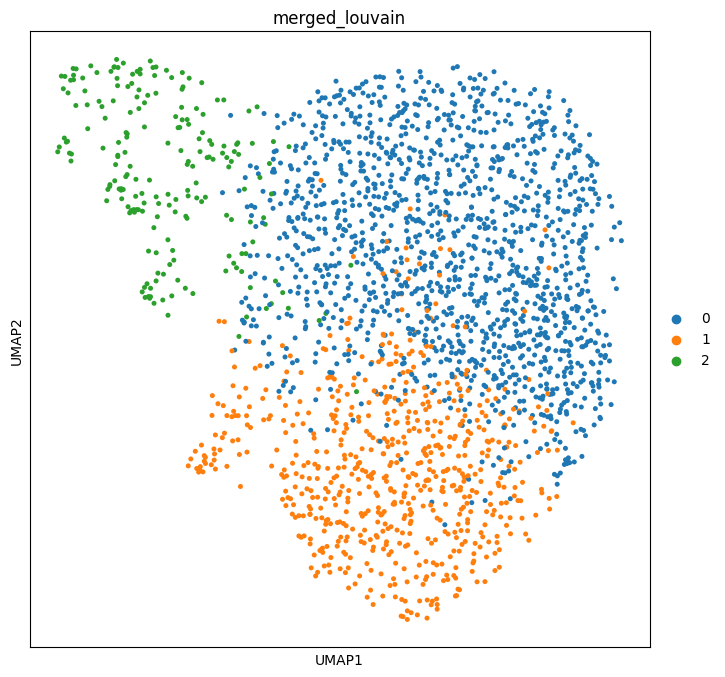

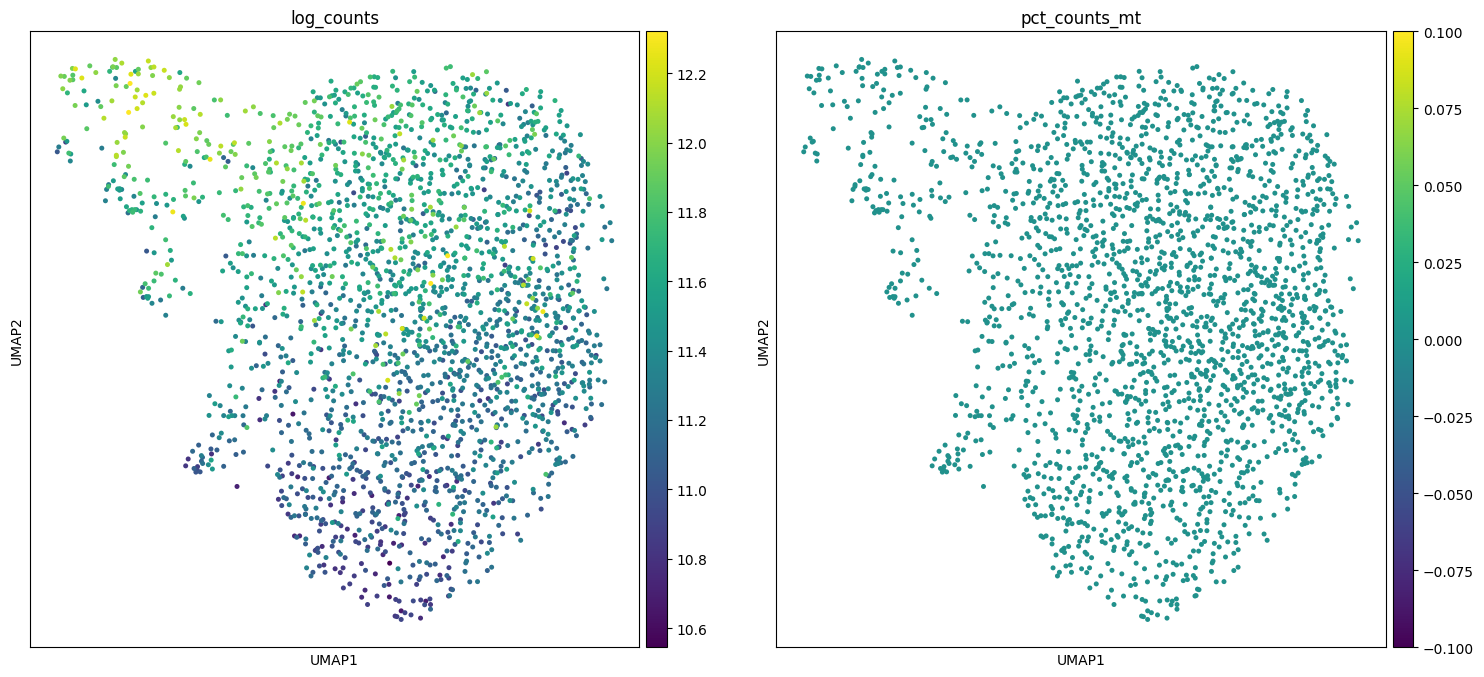

In [9]:
# Analysis sees 3 classes here
# Visualize the clustering and how this is reflected by different technical covariates
sc.pl.umap(adata, color=['merged_louvain'])

sc.pl.umap(adata, color=['log_counts', 'pct_counts_mt'])

/Users/till.richter/anaconda3/envs/celldreamer/lib/python3.11/site-packages/scanpy/plotting/_tools/scatterplots.py:391: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


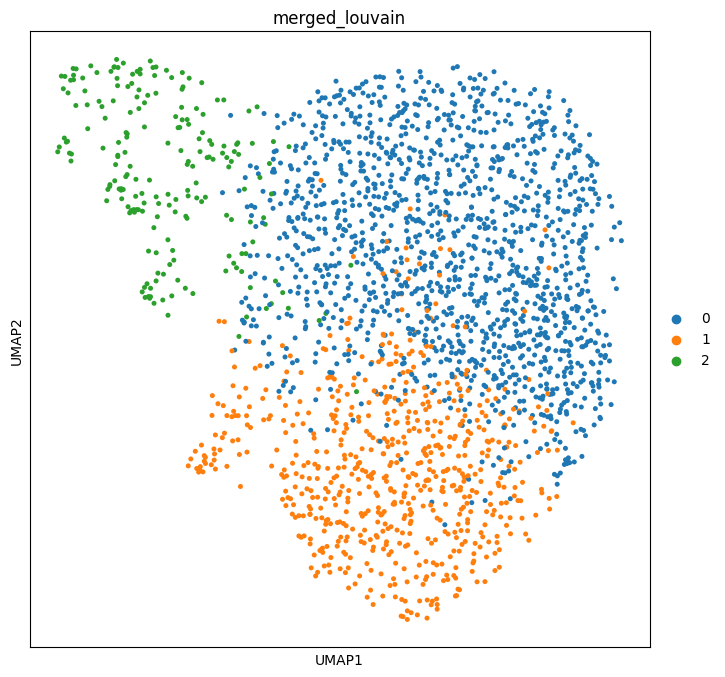

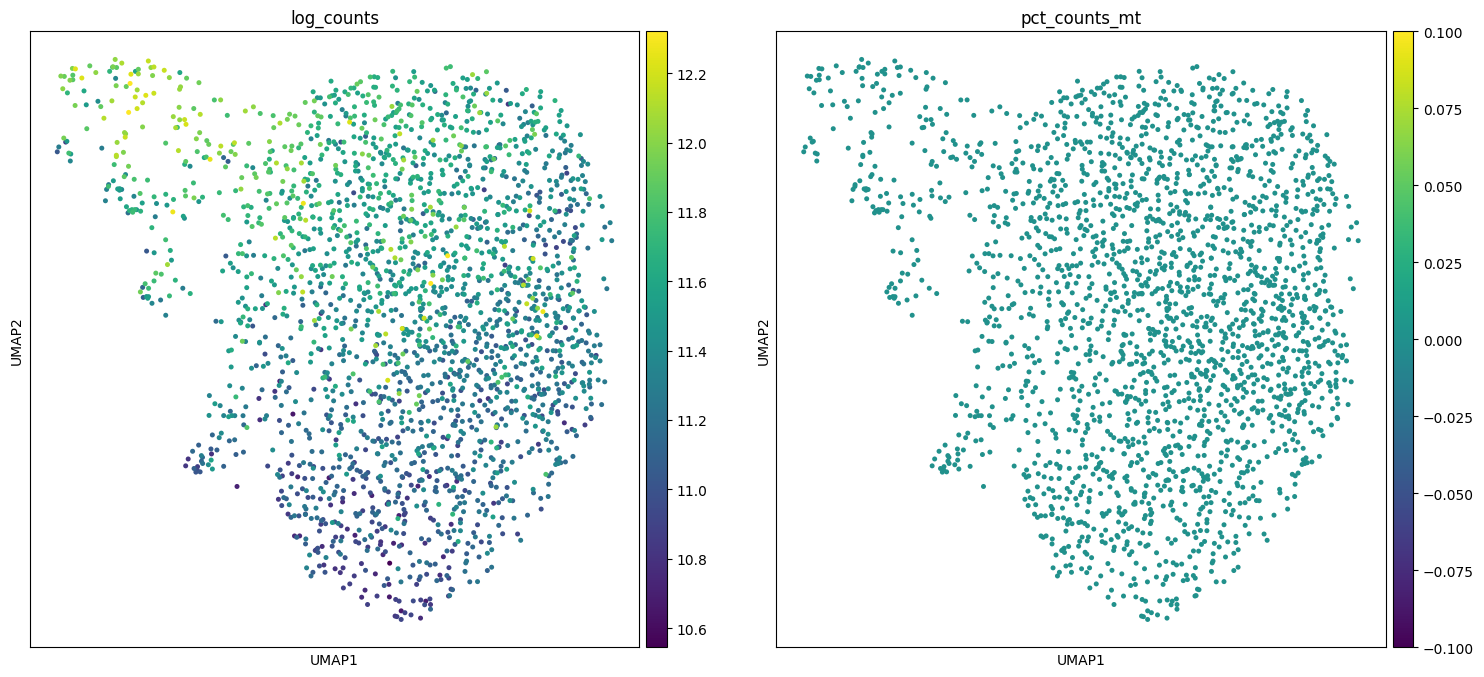

In [10]:
# Analysis sees 3 classes here
# Visualize the clustering and how this is reflected by different technical covariates
sc.pl.umap(adata, color=['merged_louvain'], save='umap_4_tree-like.pdf')
# os.rename("figures/umap4_tree-like.pdf", 
#           "../rev_results/task1/4_tree-like/UMAP.pdf")

sc.pl.umap(adata, color=['log_counts', 'pct_counts_mt'], save='umap_counts_4_tree-like.pdf')
# os.rename("figures/umap/4_tree-like/UMAP_counts.pdf", 
#           "../rev_results/task1/4_tree-like/UMAP_counts.pdf")

<a id="Markers"></a>

## Marker genes & cluster annotation

In [11]:
# Create a new AnnData object with gene symbols as var indices
adata_tmp = sc.AnnData(
    X=adata.X,  # Assuming you want to keep the same expression data
    obs=adata.obs.copy(),  # Copy the obs information from the original AnnData
)

# Set the gene symbols as var indices
adata_tmp.var.index = adata.var['gene_symbols-0-0-0-0-0-0']

In [12]:
# Perform gene ranking on the modified AnnData object
sc.tl.rank_genes_groups(adata_tmp, groupby='merged_louvain', key_added='rank_genes_merged_louvain')



ranking genes
    finished: added to `.uns['rank_genes_merged_louvain']`
    'names', sorted np.recarray to be indexed by group ids
    'scores', sorted np.recarray to be indexed by group ids
    'logfoldchanges', sorted np.recarray to be indexed by group ids
    'pvals', sorted np.recarray to be indexed by group ids
    'pvals_adj', sorted np.recarray to be indexed by group ids (0:00:00)


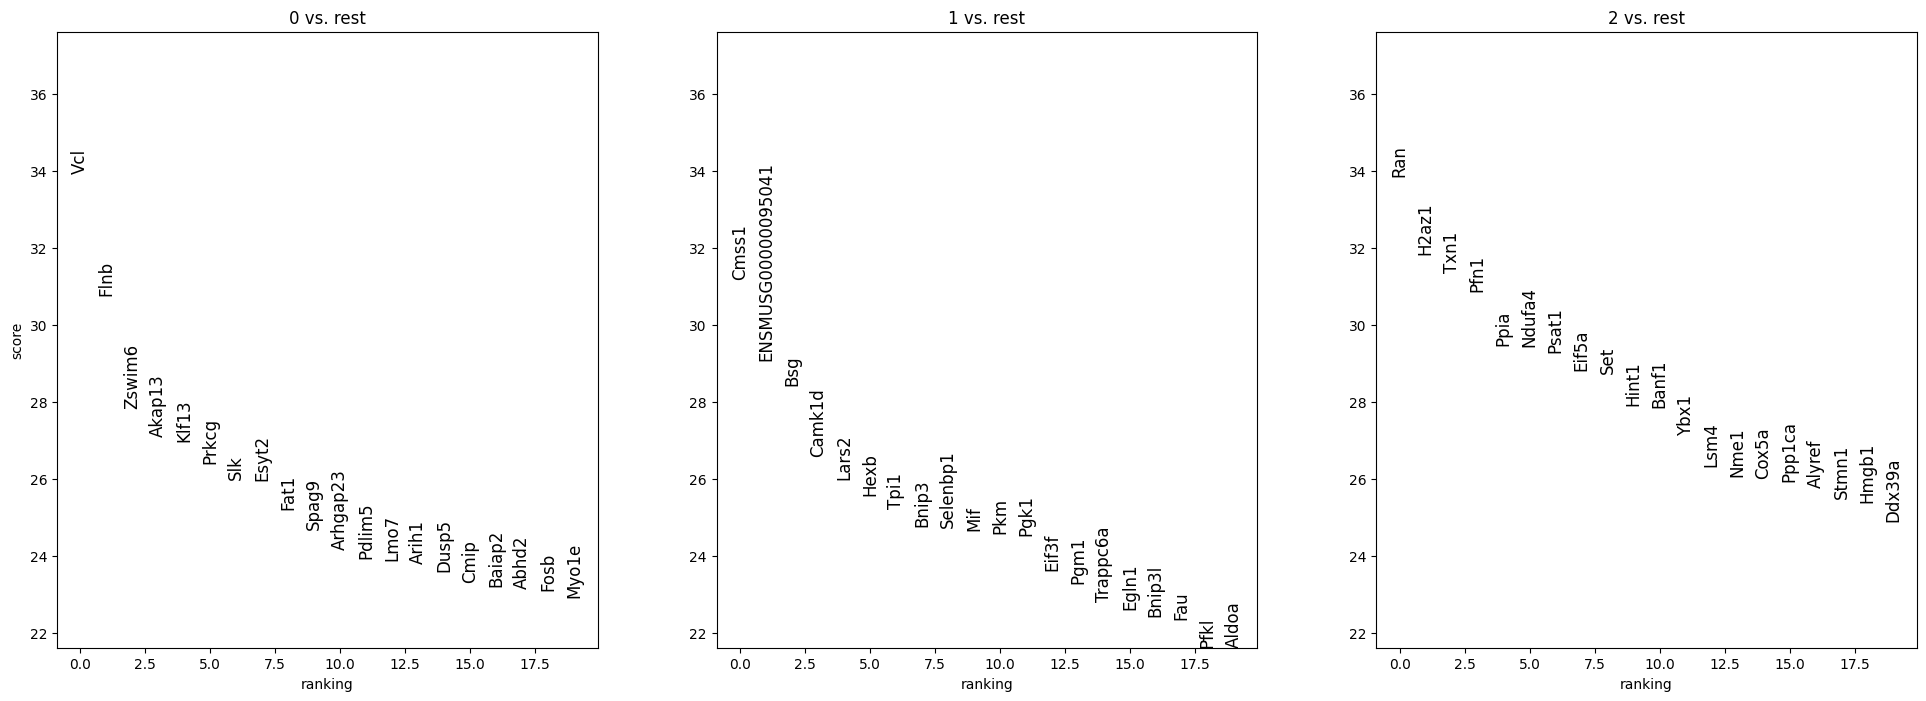

In [13]:
# Visualize the results using gene symbols
sc.pl.rank_genes_groups(adata_tmp, key='rank_genes_merged_louvain', groups=['0', '1', '2'], fontsize=12)

In [14]:
# Define a nice colour map for gene expression
colors2 = plt.cm.Reds(np.linspace(0, 1, 128))
colors3 = plt.cm.Greys_r(np.linspace(0.7,0.8,20))
colorsComb = np.vstack([colors3, colors2])
mymap = colors.LinearSegmentedColormap.from_list('my_colormap', colorsComb)

Below we plot genes of particular interest within the clusters

### Cluster 0

Encrypted symbol for  Vcl is  ENSMUSG00000021823


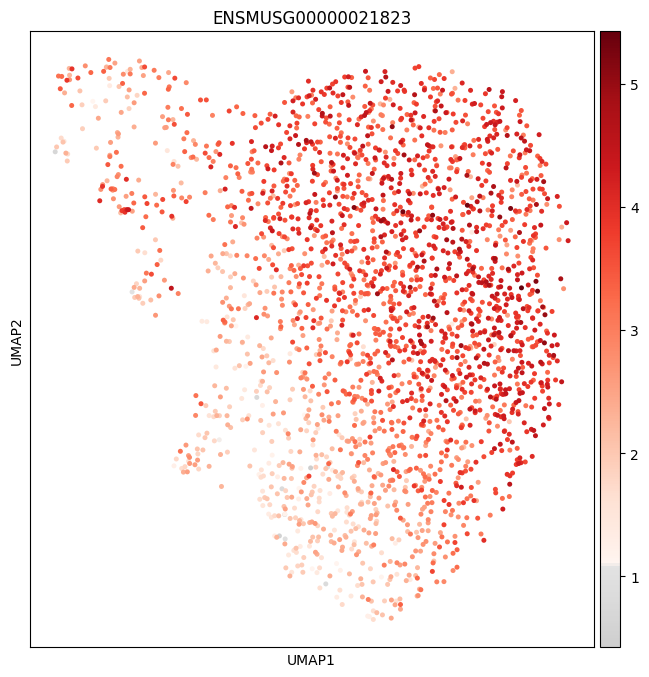

Encrypted symbol for  Flnb is  ENSMUSG00000025278


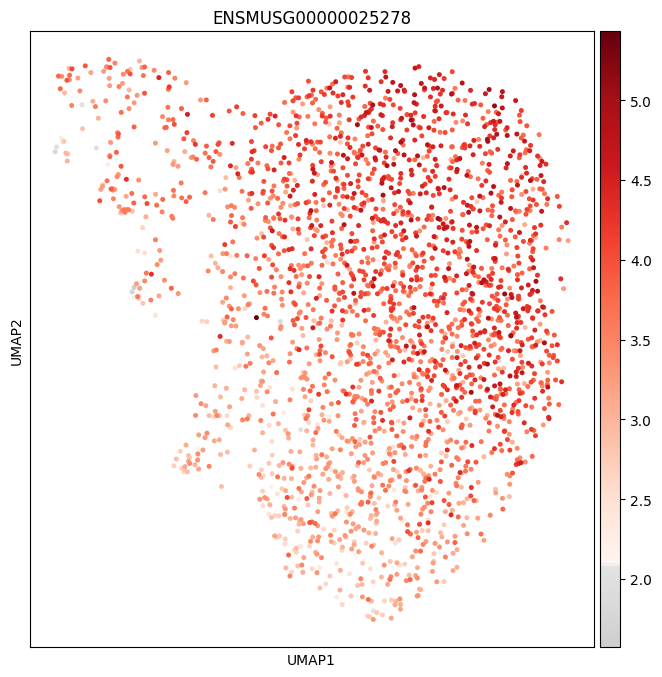

Encrypted symbol for  Zswim6 is  ENSMUSG00000032846


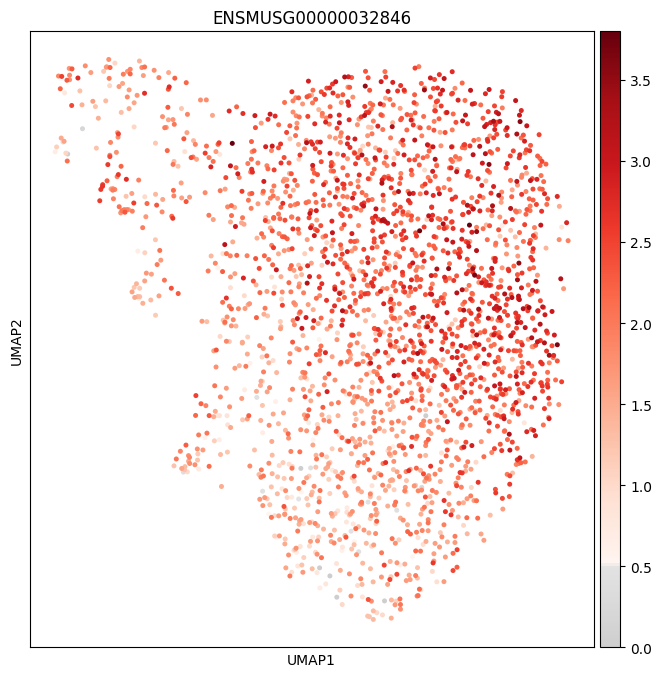

Encrypted symbol for  Akap13 is  ENSMUSG00000066406


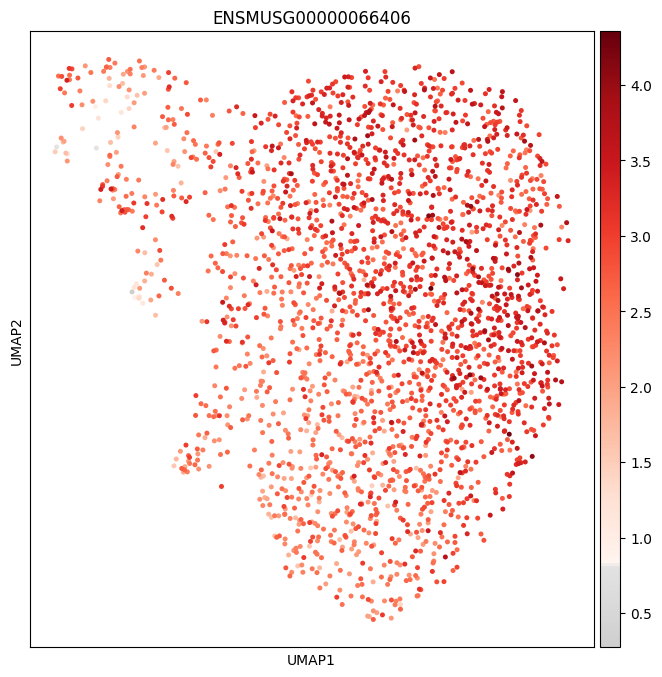

Encrypted symbol for  Klf13 is  ENSMUSG00000052040


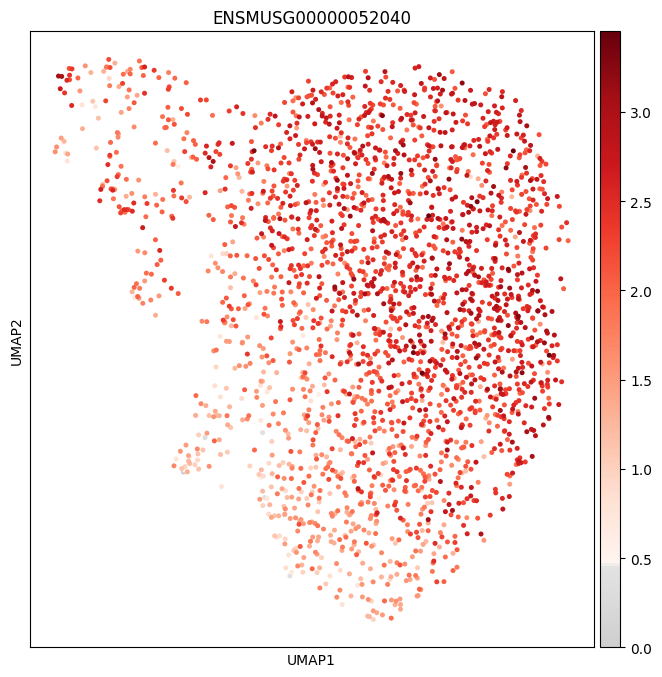

In [15]:
gene_symbols = ['Vcl', 'Flnb', 'Zswim6', 'Akap13', 'Klf13']

for gene_symbol in gene_symbols:
    encrypted_symbol = adata.var[adata.var['gene_symbols-0-0-0-0-0-0'] == gene_symbol].index[0]
    print('Encrypted symbol for ', gene_symbol, 'is ', encrypted_symbol)
    sc.pl.umap(adata, color=encrypted_symbol, use_raw=False, color_map=mymap, save='/4_tree-like_Cluster0_' + gene_symbol + '.pdf')


## Cluster 1

Encrypted symbol for  Cmss1 is  ENSMUSG00000022748


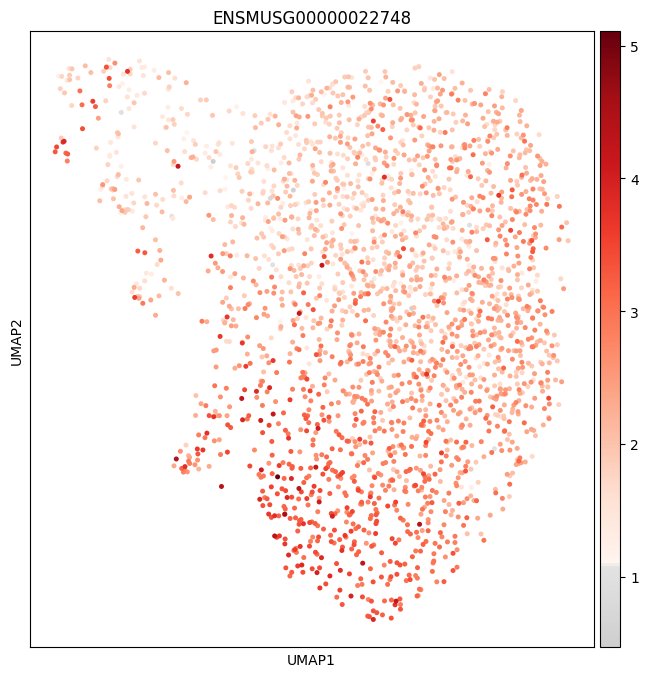

Encrypted symbol for  ENSMUSG00000095041 is  ENSMUSG00000095041


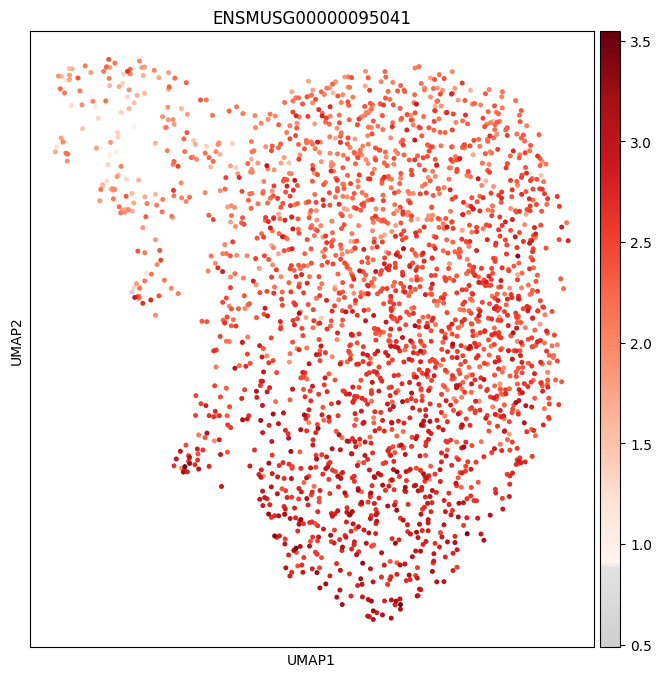

Encrypted symbol for  Bsg is  ENSMUSG00000023175


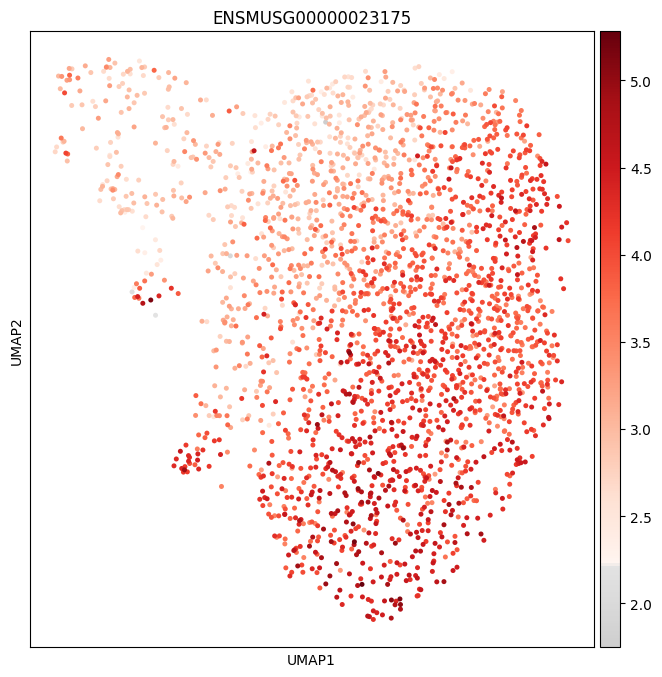

Encrypted symbol for  Camk1d is  ENSMUSG00000039145


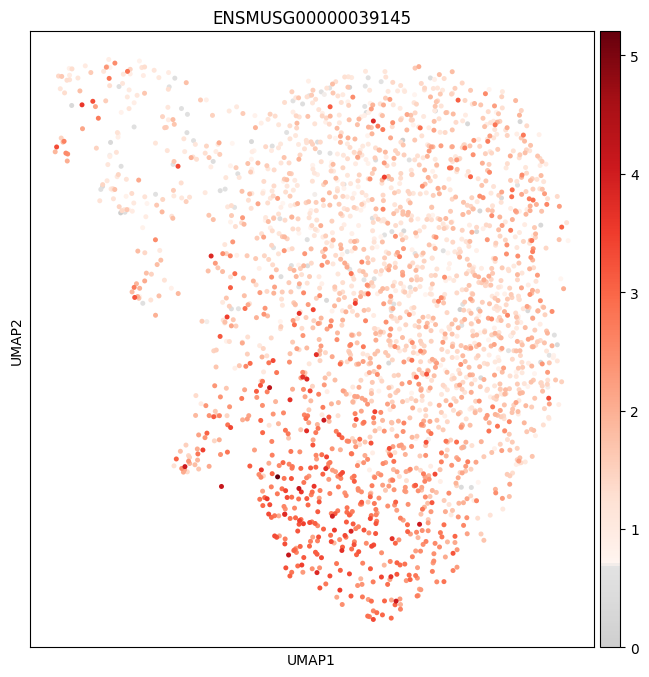

Encrypted symbol for  Lars2 is  ENSMUSG00000035202


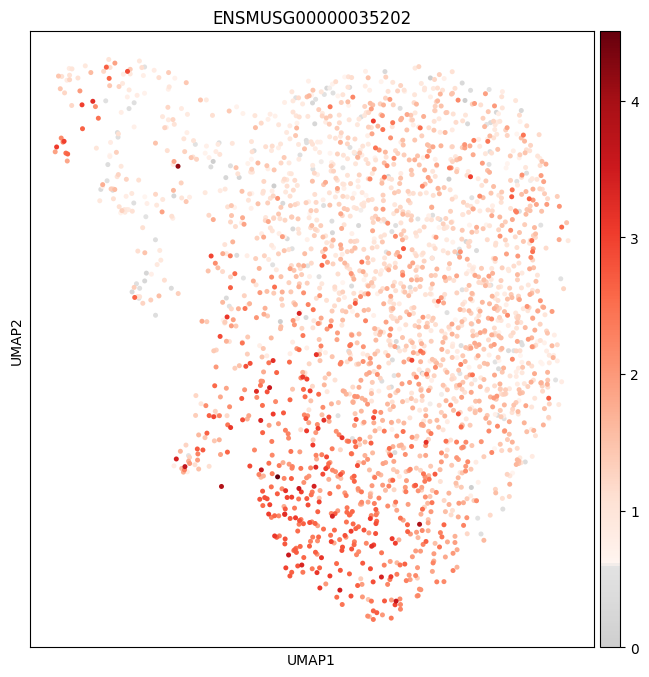

In [16]:
gene_symbols = ['Cmss1', 'ENSMUSG00000095041', 'Bsg', 'Camk1d', 'Lars2']

for gene_symbol in gene_symbols:
    encrypted_symbol = adata.var[adata.var['gene_symbols-0-0-0-0-0-0'] == gene_symbol].index[0]
    print('Encrypted symbol for ', gene_symbol, 'is ', encrypted_symbol)
    sc.pl.umap(adata, color=encrypted_symbol, use_raw=False, color_map=mymap, save='/4_tree-like_Cluster1_' + gene_symbol + '.pdf')


## Cluster 2

Encrypted symbol for  Ran is  ENSMUSG00000029430


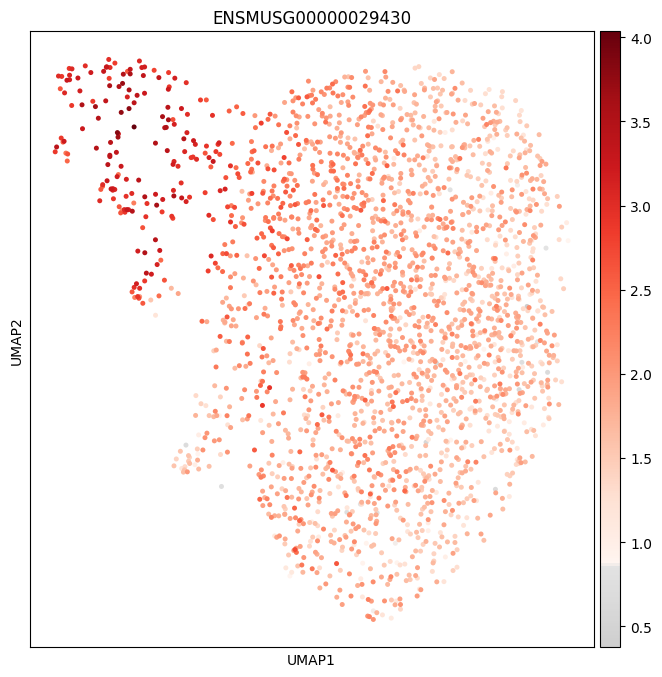

Encrypted symbol for  H2az1 is  ENSMUSG00000037894


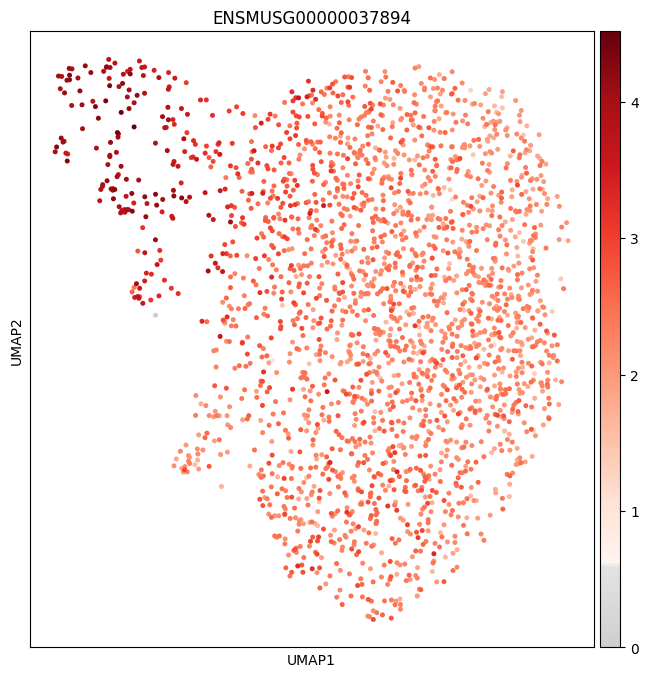

Encrypted symbol for  Txn1 is  ENSMUSG00000028367


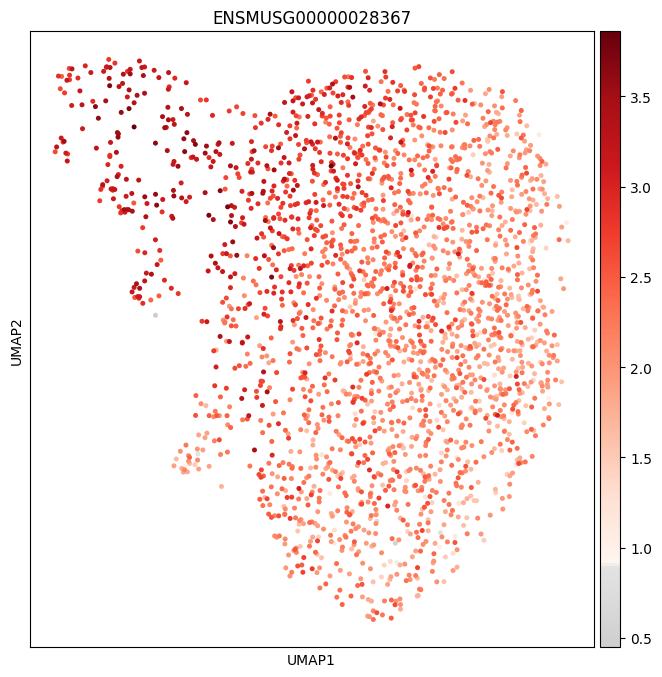

Encrypted symbol for  Pfn1 is  ENSMUSG00000018293


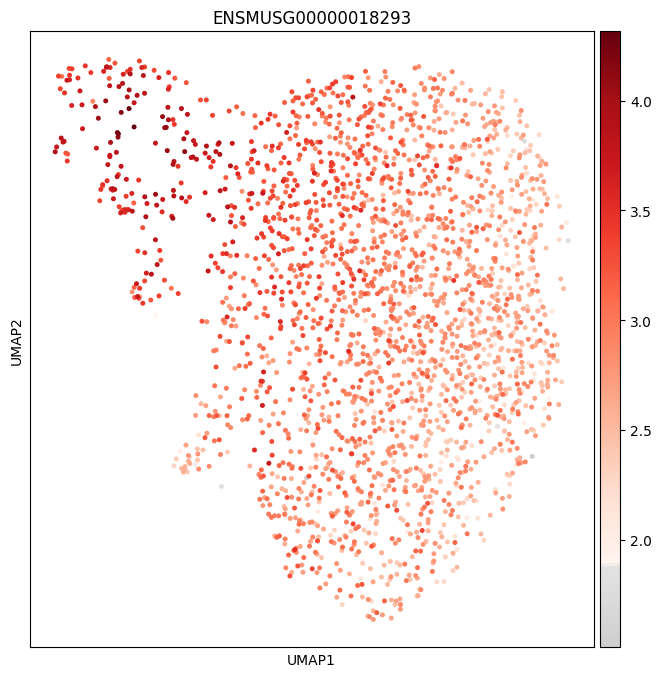

In [17]:
gene_symbols = ['Ran', 'H2az1', 'Txn1', 'Pfn1']

for gene_symbol in gene_symbols:
    encrypted_symbol = adata.var[adata.var['gene_symbols-0-0-0-0-0-0'] == gene_symbol].index[0]
    print('Encrypted symbol for ', gene_symbol, 'is ', encrypted_symbol)
    sc.pl.umap(adata, color=encrypted_symbol, use_raw=False, color_map=mymap, save='/4_tree-like_Cluster2_' + gene_symbol + '.pdf')


Encrypted symbol for  Ran is  ENSMUSG00000029430


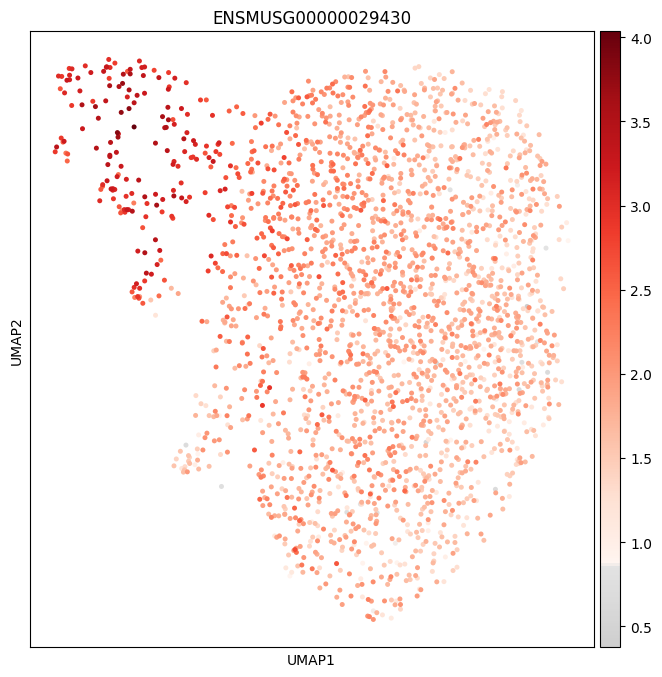

Encrypted symbol for  H2az1 is  ENSMUSG00000037894


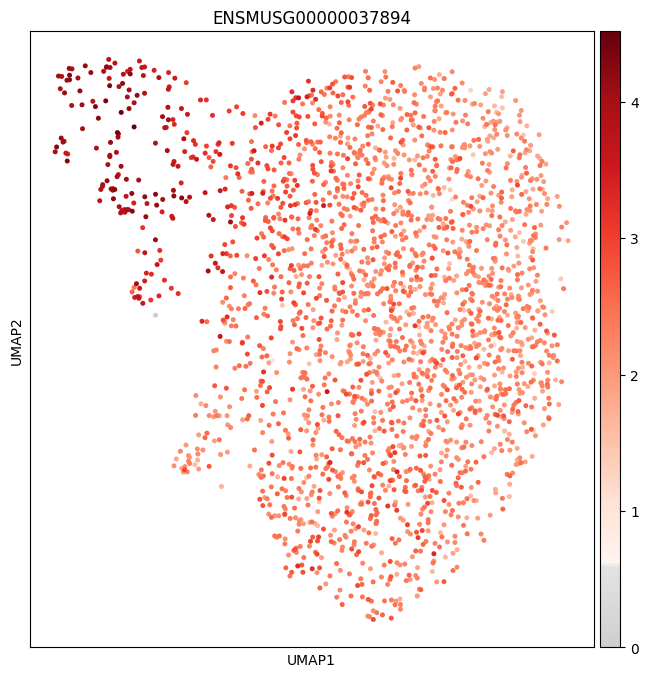

Encrypted symbol for  Txn1 is  ENSMUSG00000028367


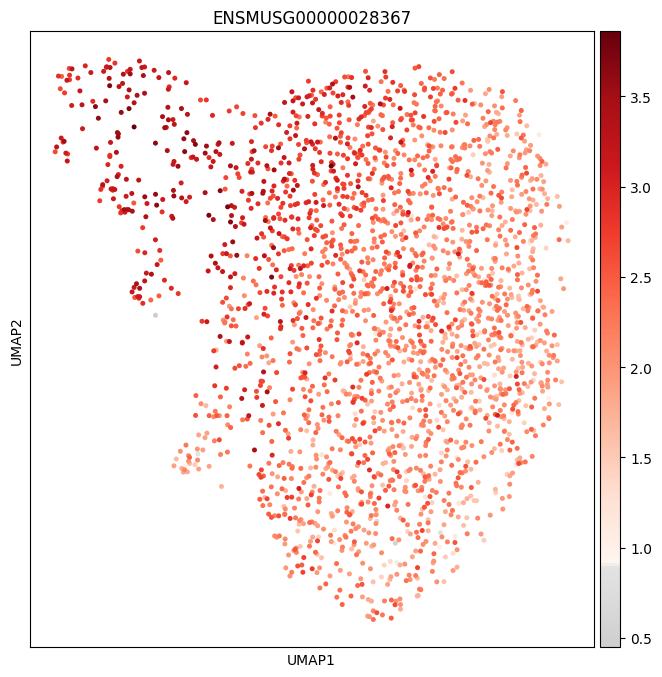

Encrypted symbol for  Pfn1 is  ENSMUSG00000018293


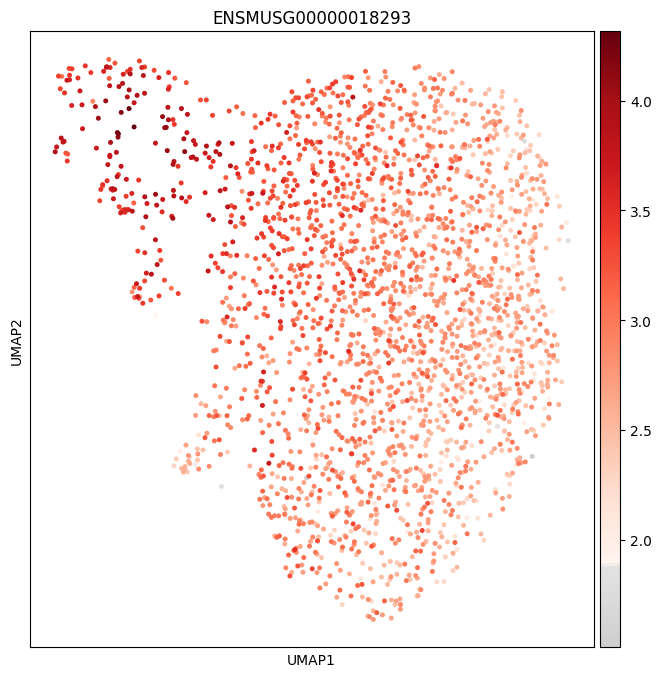

In [19]:
gene_symbols = ['Ran', 'H2az1', 'Txn1', 'Pfn1']

for gene_symbol in gene_symbols:
    encrypted_symbol = adata.var[adata.var['gene_symbols-0-0-0-0-0-0'] == gene_symbol].index[0]
    print('Encrypted symbol for ', gene_symbol, 'is ', encrypted_symbol)
    sc.pl.umap(adata, color=encrypted_symbol, use_raw=False, color_map=mymap, save='/4_tree-like_Cluster3_' + gene_symbol + '.pdf')


Encrypted symbol for  Bnip3 is  ENSMUSG00000078566


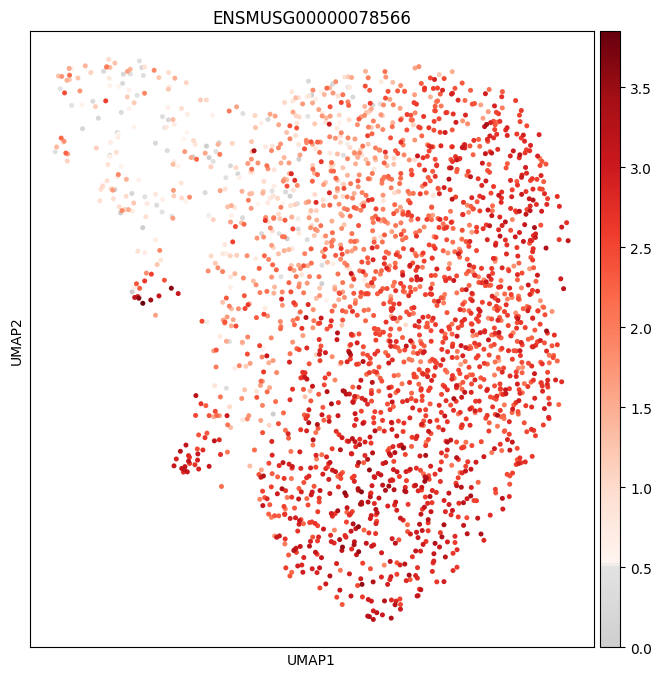

Encrypted symbol for  Fosb is  ENSMUSG00000003545


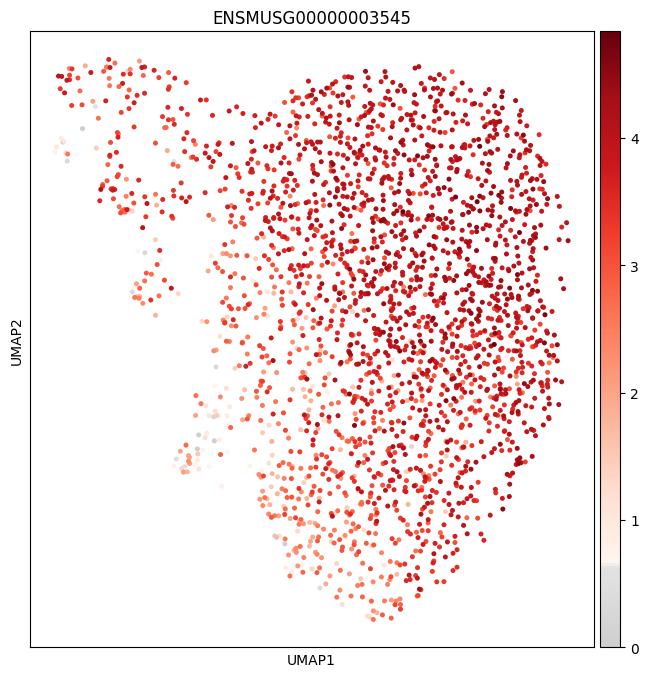

Encrypted symbol for  Bsg is  ENSMUSG00000023175


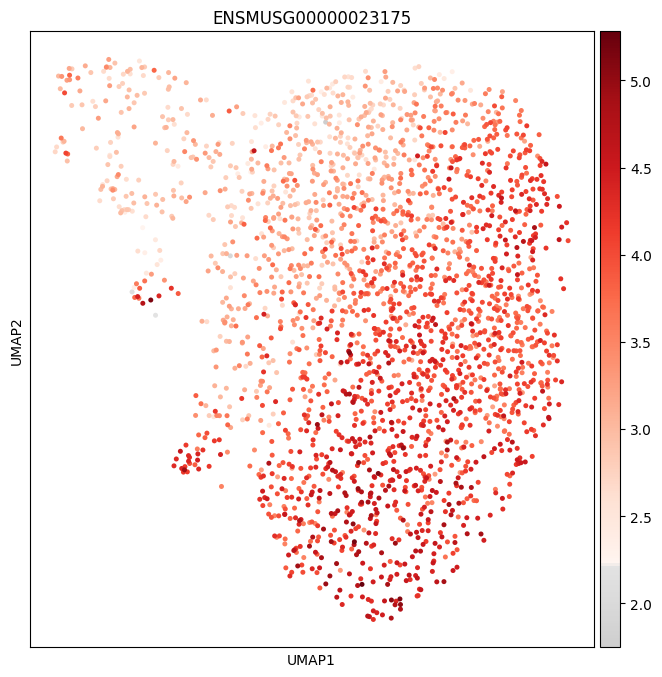

Encrypted symbol for  Gapdh is  ENSMUSG00000057666


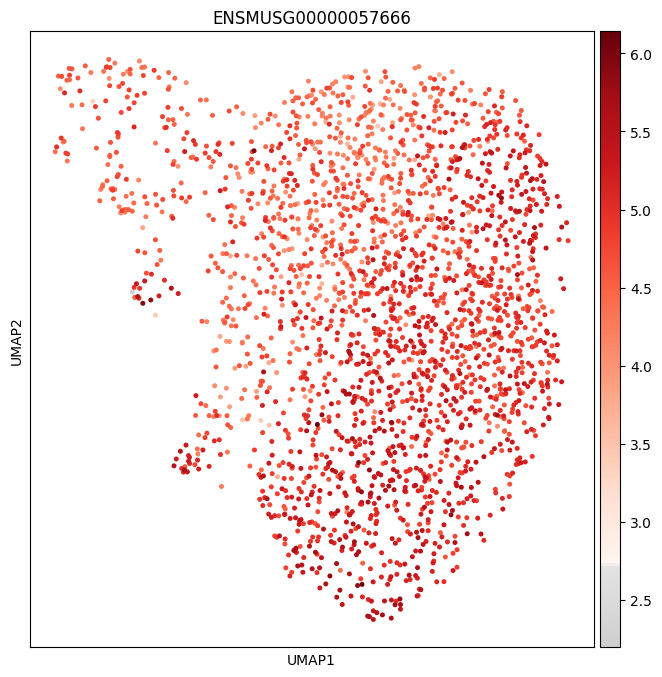

In [21]:
gene_symbols = ['Bnip3', 'Fosb', 'Bsg', 'Gapdh']

for gene_symbol in gene_symbols:
    encrypted_symbol = adata.var[adata.var['gene_symbols-0-0-0-0-0-0'] == gene_symbol].index[0]
    print('Encrypted symbol for ', gene_symbol, 'is ', encrypted_symbol)
    sc.pl.umap(adata, color=encrypted_symbol, use_raw=False, color_map=mymap, save='/4_tree-like_Cluster4_' + gene_symbol + '.pdf')


Encrypted symbol for  mt-Atp8 is  ENSMUSG00000064356


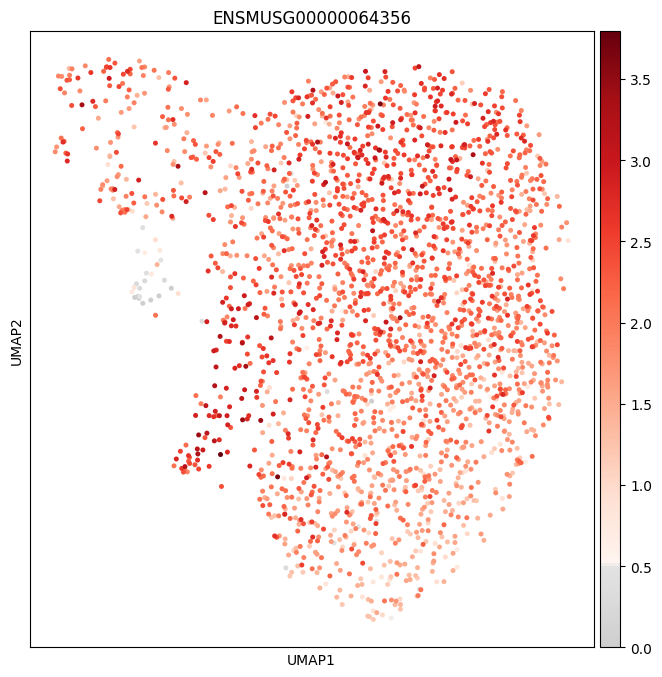

Encrypted symbol for  4833420G17Rik is  ENSMUSG00000062822


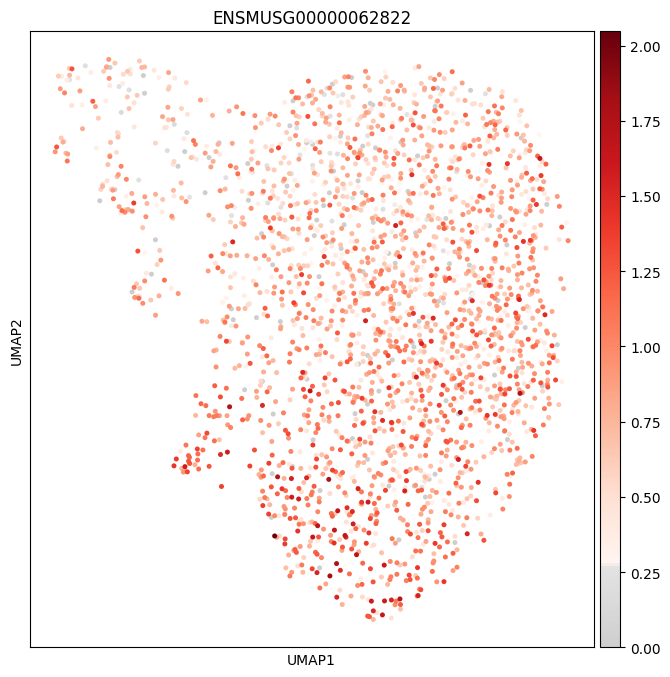

In [24]:
gene_symbols = ['mt-Atp8', '4833420G17Rik']

for gene_symbol in gene_symbols:
    encrypted_symbol = adata.var[adata.var['gene_symbols-0-0-0-0-0-0'] == gene_symbol].index[0]
    print('Encrypted symbol for ', gene_symbol, 'is ', encrypted_symbol)
    sc.pl.umap(adata, color=encrypted_symbol, use_raw=False, color_map=mymap, save='/4_tree-like_Cluster5_' + gene_symbol + '.pdf')
